In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
matches_df = pd.read_csv('IPL_Matches_2008_2022.csv')
matches_df.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,29-05-2022,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,27-05-2022,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,25-05-2022,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,Eden Gardens,Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,24-05-2022,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,Eden Gardens,Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,22-05-2022,2022,70,Sunrisers Hyderabad,Punjab Kings,Wankhede Stadium,Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [3]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             930 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

## Data Information & Key Insights

In [4]:
# Seasons we have got in the dataset

matches_df['Season'].unique()

array(['2022', '2021', '2020/21', '2019', '2018', '2017', '2016', '2015',
       '2014', '2013', '2012', '2011', '2009/10', '2009', '2007/08'],
      dtype=object)

In [5]:
## team won by maximum runs

matches_df[matches_df['Margin'] == matches_df.loc[matches_df['WonBy'] == 'Runs',:]['Margin'].max()][['WinningTeam','Margin']]

,WinningTeam,Margin
329,Mumbai Indians,146.0


In [6]:
## team won by maximum wickets

matches_df[matches_df['Margin'] == matches_df.loc[matches_df['WonBy'] == 'Wickets',:]['Margin'].max()][['WinningTeam','Margin']].value_counts()
    
# Royal chalenger bangalore won by 10 wickets maximum times

WinningTeam                  Margin
Royal Challengers Bangalore  10.0      7
Sunrisers Hyderabad          10.0      5
Kolkata Knight Riders        10.0      4
Rajasthan Royals             10.0      4
Chennai Super Kings          10.0      3
Delhi Capitals               10.0      3
Mumbai Indians               10.0      3
Punjab Kings                 10.0      1
dtype: int64

In [7]:
# team won by minimum runs

matches_df[matches_df['Margin'] == matches_df.loc[matches_df['WonBy'] == 'Runs',:]['Margin'].min()][['WinningTeam','Margin']].value_counts()

# Mumbai indians won by 1 run 3 times

WinningTeam                  Margin
Mumbai Indians               1.0       3
Royal Challengers Bangalore  1.0       3
Chennai Super Kings          1.0       2
Punjab Kings                 1.0       2
Delhi Capitals               1.0       1
Gujarat Titans               1.0       1
Kolkata Knight Riders        1.0       1
Sunrisers Hyderabad          1.0       1
dtype: int64

In [8]:
# team won by minimum wickets

matches_df[matches_df['Margin'] == matches_df.loc[matches_df['WonBy'] == 'Wickets',:]['Margin'].min()][['WinningTeam','Margin']].value_counts()

## Mumbai indians won by 1 wicket 3 times

WinningTeam                  Margin
Mumbai Indians               1.0       3
Royal Challengers Bangalore  1.0       3
Chennai Super Kings          1.0       2
Punjab Kings                 1.0       2
Delhi Capitals               1.0       1
Gujarat Titans               1.0       1
Kolkata Knight Riders        1.0       1
Sunrisers Hyderabad          1.0       1
dtype: int64

## Observation

    1.Mumbai Indians won by maximum runs(146)
    2.Royal chalengers Bangalore won by maximum wickets 7 times
    3.mumbai indians won by minimum runs and wickets more than once



2013       76
2022       74
2012       74
2011       73
2021       60
2020/21    60
2019       60
2018       60
2016       60
2014       60
2009/10    60
2017       59
2015       59
2007/08    58
2009       57
Name: Season, dtype: int64


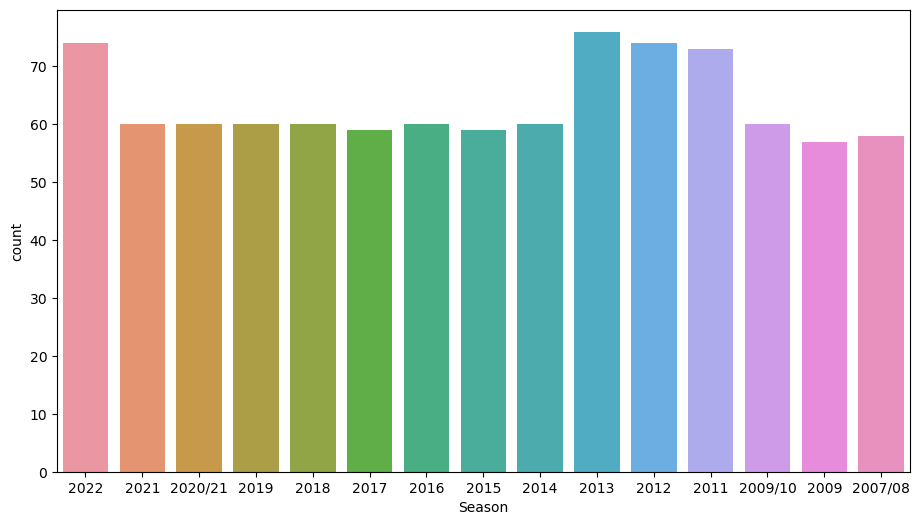

In [9]:
#Season Which had most number of matches

print(matches_df['Season'].value_counts())

plt.figure(figsize=(11,6))
sns.countplot(x='Season', data=matches_df)
plt.show()

   ## In 2013, we have the most number of matches

Mumbai Indians                 131
Chennai Super Kings            121
Kolkata Knight Riders          114
Royal Challengers Bangalore    109
Sunrisers Hyderabad            104
Delhi Capitals                 103
Punjab Kings                   101
Rajasthan Royals                96
Pune Warriors                   27
Gujarat Titans                  25
Lucknow Super Giants             9
Kochi Tuskers Kerala             6
Name: WinningTeam, dtype: int64


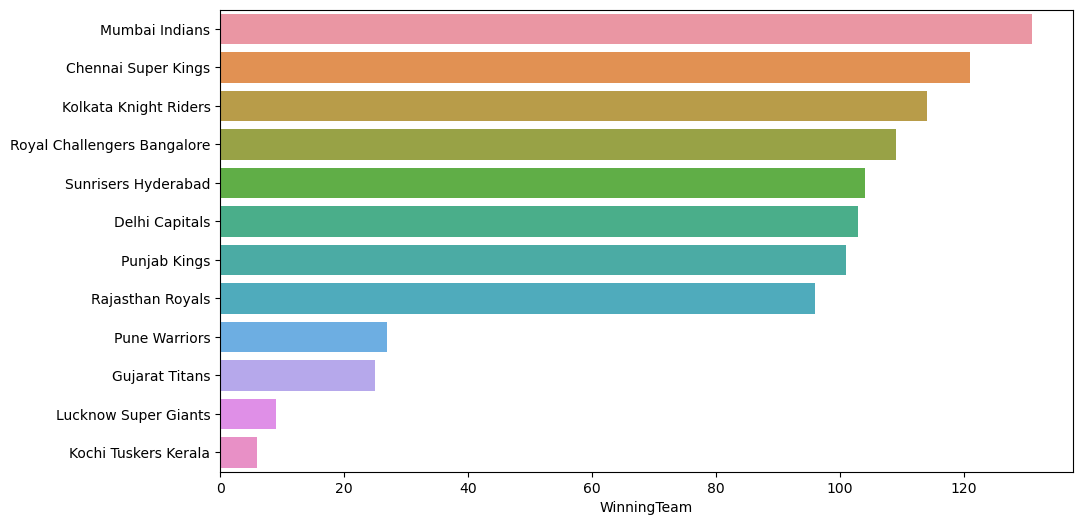

In [10]:
# times teams have won the matches in the Ipl career

plt.figure(figsize=(11,6))
data = matches_df.WinningTeam.value_counts()
print(data)
sns.barplot(y = data.index, x = data, orient='h')
plt.show()

### Mumbai Indians won maximum number of matches in the history of IPL

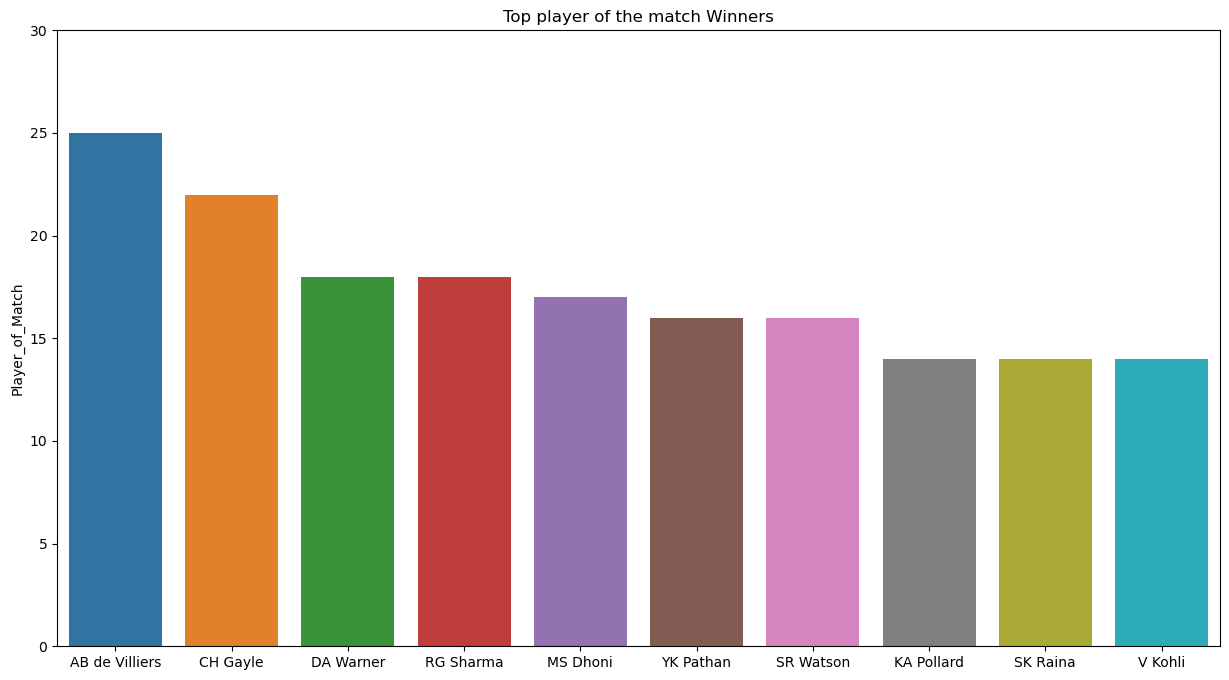

In [11]:
# Top Player of the match winners

top_players = matches_df.Player_of_Match.value_counts()[:10]
fig, ax = plt.subplots(figsize=(15,8))
ax.set_ylim([0,30])
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
sns.barplot(x = top_players.index, y = top_players);

### Ab De Villiers & CH Gayle are the most Successful players in all match winners

In [12]:
# total no. of venues 

matches_df['Venue'].value_counts().count()

41

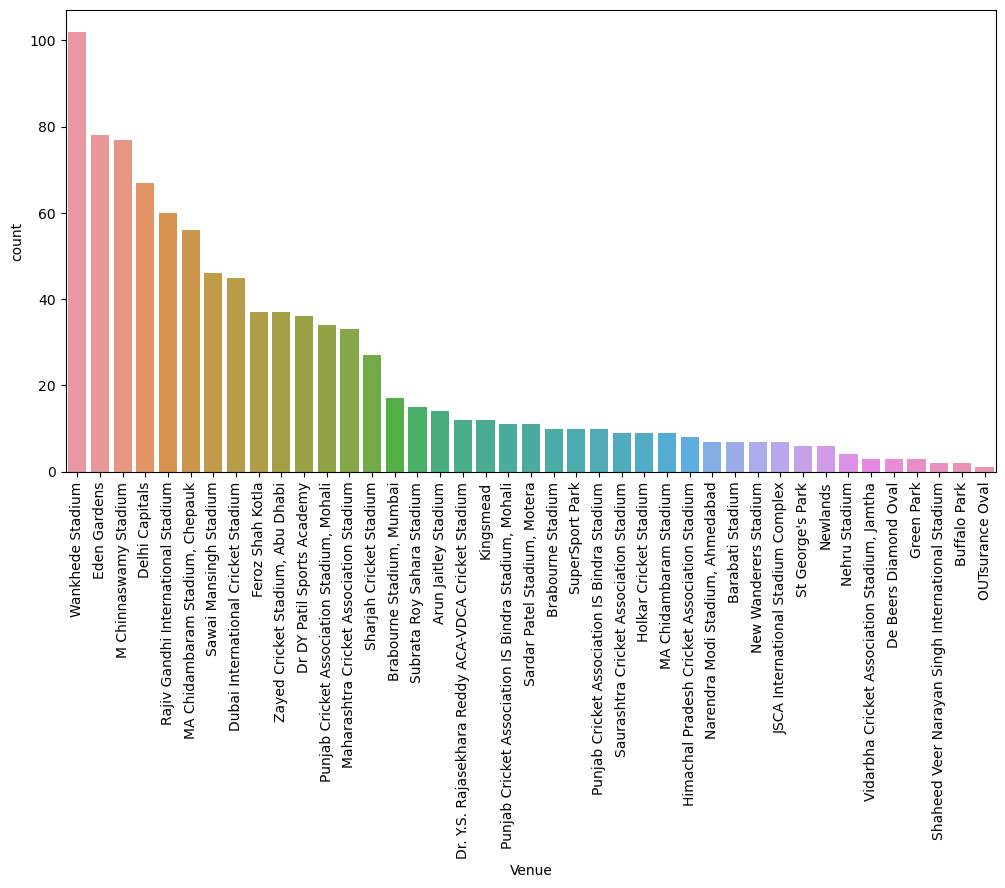

In [13]:
# Number of matches in each venue

plt.figure(figsize=(12,6))
category_counts = matches_df['Venue'].value_counts().sort_values(ascending= False).index
sns.countplot(x='Venue', data=matches_df, orient='v', order=category_counts)
plt.xticks(rotation='vertical')
plt.show()

### Most matches are played in Wankhede Stadium followed by M Chinnaswamy stadium till IPL 2022

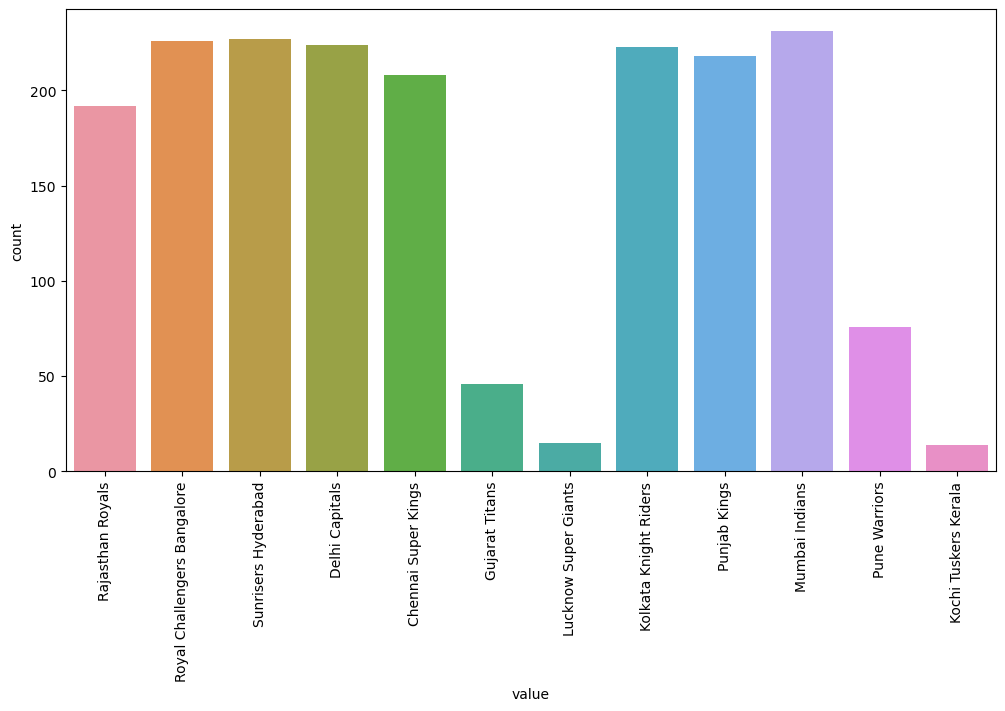

In [14]:
# NUmber of matches played by each team

temp_df = pd.melt(matches_df, id_vars=['ID','Season'], value_vars=['Team1', 'Team2'])

plt.figure(figsize=(12,6))
sns.countplot(x='value', data=temp_df)
plt.xticks(rotation='vertical')
plt.show()

 ### Mumbai Indians Played maximum matches in IPL

In [15]:
# temp_df.value.value_counts()

In [16]:
# matches_df.WinningTeam.value_counts()

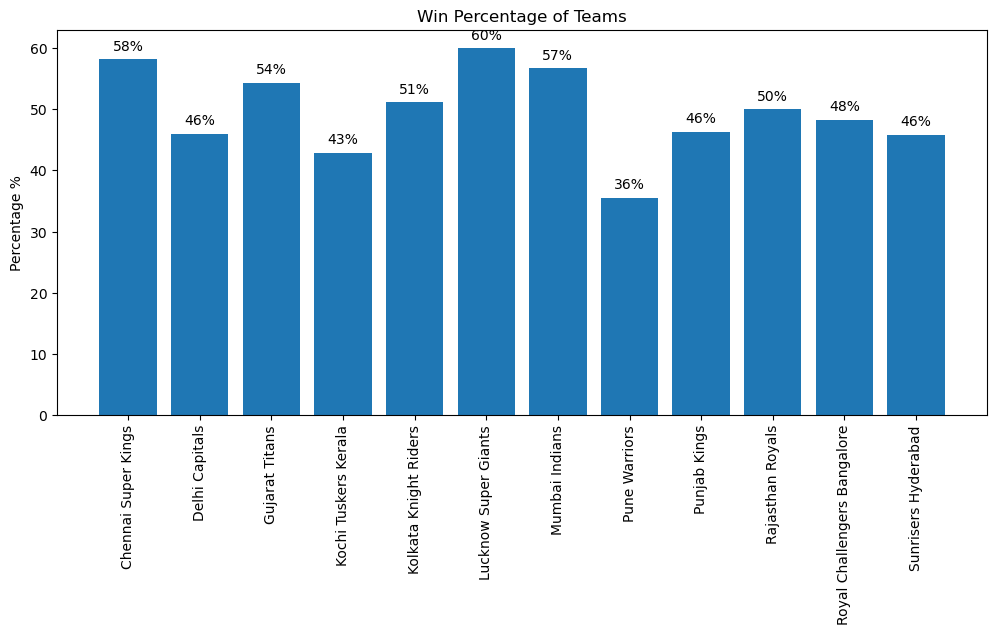

In [17]:
# win percentage for every teams

perc = matches_df.WinningTeam.value_counts()/temp_df.value.value_counts()*100
plt.figure(figsize=(12,5))
#sns.barplot(x = perc.index, y = perc)
plt.bar(perc.index, perc)

total = sum(perc)
percentages = [round(count) for count in perc]
for i in range(len(perc.index)):
    plt.text(perc.index[i], perc[i] + 1, f'{percentages[i]}%', ha='center', va='bottom')

plt.xticks(rotation='vertical')
plt.title('Win Percentage of Teams')
plt.ylabel('Percentage %')
plt.show()

In [18]:
# Champions in each season

temp_df = matches_df.drop_duplicates(subset=['Season'], keep='first')[['Season', 'WinningTeam']].reset_index(drop=True)
temp_df

,Season,WinningTeam
0,2022,Gujarat Titans
1,2021,Chennai Super Kings
2,2020/21,Mumbai Indians
3,2019,Mumbai Indians
4,2018,Chennai Super Kings
5,2017,Mumbai Indians
6,2016,Sunrisers Hyderabad
7,2015,Mumbai Indians
8,2014,Kolkata Knight Riders
9,2013,Mumbai Indians


In [19]:
# lets see the counts of each champion teams

temp_df.WinningTeam.value_counts()

Mumbai Indians           5
Chennai Super Kings      4
Sunrisers Hyderabad      2
Kolkata Knight Riders    2
Gujarat Titans           1
Rajasthan Royals         1
Name: WinningTeam, dtype: int64

### Mumbai Indians Won most of the IPL Champians titles

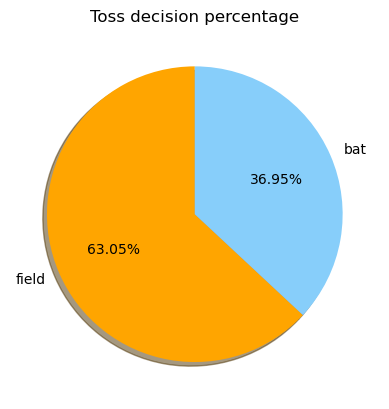

In [20]:
# toss decisions Taken so far

temp_series = matches_df.TossDecision.value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
colors = ['orange', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.2f%%', shadow=True, startangle=90)
plt.title("Toss decision percentage")
plt.show()

### Almost 63% of the toss decisions are made to field first

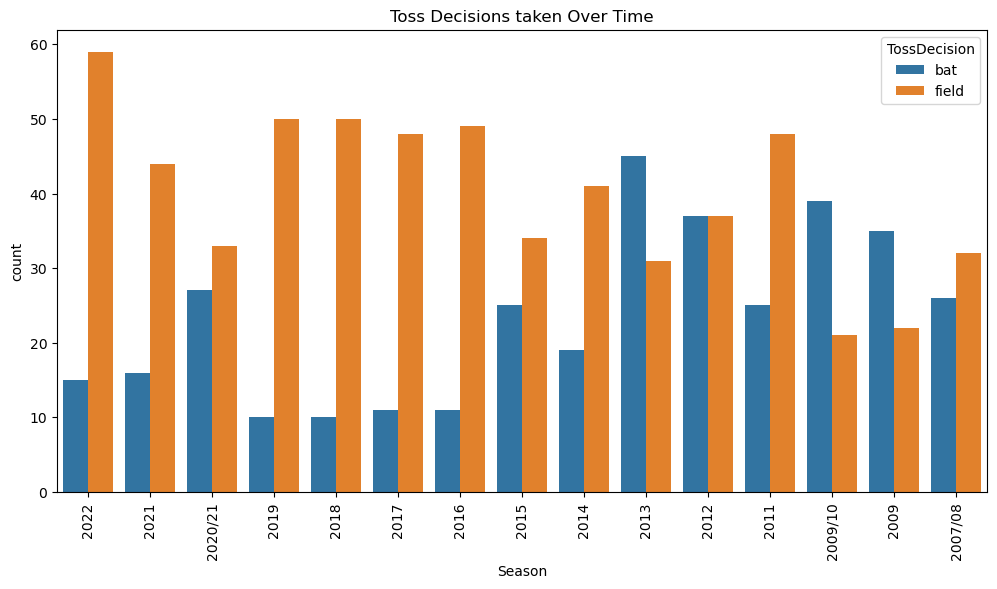

In [21]:
# lets see toss decisions varied over time

plt.figure(figsize=(12,6))
sns.countplot(x='Season', hue='TossDecision', data=matches_df)
plt.xticks(rotation='vertical')
plt.title('Toss Decisions taken Over Time')
plt.show()

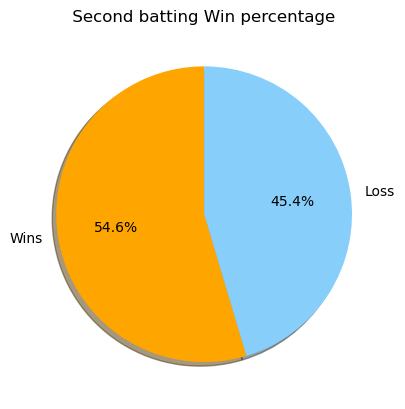

In [22]:
# let us see the win percentage of teams batting second

num_of_wins = matches_df[(matches_df['WonBy'] == 'Wickets') & (matches_df['Margin'] > 0)].count()["ID"]
num_of_loss = matches_df[(matches_df['WonBy'] == 'Runs') & (matches_df['Margin'] > 0)].count()["ID"]
labels = ["Wins", "Loss"]
total = float(num_of_wins + num_of_loss)
sizes = [(num_of_wins/total)*100, (num_of_loss/total)*100]
colors = ['orange', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title(" Second batting Win percentage ")
plt.show()

### Data Preparation

In [23]:
# checking and changing old teams names to new names

matches_df.TossWinner.value_counts()

Mumbai Indians                 123
Sunrisers Hyderabad            117
Delhi Capitals                 116
Kolkata Knight Riders          114
Chennai Super Kings            109
Royal Challengers Bangalore    105
Rajasthan Royals                99
Punjab Kings                    94
Pune Warriors                   33
Gujarat Titans                  25
Kochi Tuskers Kerala             8
Lucknow Super Giants             7
Name: TossWinner, dtype: int64

In [24]:
matches_df.isnull().sum()

# null values in city need to be fix

ID                   0
City                20
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            4
WinningTeam          4
WonBy                0
Margin              18
method             931
Player_of_Match      4
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
dtype: int64

In [25]:
# filling the null values with the first word of the match venue

matches_df['City'].fillna(matches_df['Venue'].str.split().str[0], inplace=True)

In [26]:
matches_df.isnull().sum()

ID                   0
City                 0
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            4
WinningTeam          4
WonBy                0
Margin              18
method             931
Player_of_Match      4
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
dtype: int64

In [27]:
# checking null values in margin

matches_df[matches_df['Margin'].isnull()]['WonBy'].value_counts()

SuperOver    14
NoResults     4
Name: WonBy, dtype: int64

In [28]:
matches_df[matches_df['WonBy'] == 'NoResults']

# we can drop these four columns becouse most of the other fields are empty

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
205,1178424,Bengaluru,30-04-2019,2019,49,Royal Challengers Bangalore,Rajasthan Royals,M Chinnaswamy Stadium,Rajasthan Royals,field,NaN,NaN,NoResults,NaN,NaN,NaN,"['V Kohli', 'AB de Villiers', 'MP Stoinis', 'H...","['SV Samson', 'LS Livingstone', 'AM Rahane', '...",NJ Llong,UV Gandhe
437,829813,Bangalore,17-05-2015,2015,55,Royal Challengers Bangalore,Delhi Capitals,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,NaN,NaN,NoResults,NaN,NaN,NaN,"['V Kohli', 'CH Gayle', 'AB de Villiers', 'Man...","['Q de Kock', 'SS Iyer', 'JP Duminy', 'Yuvraj ...",HDPK Dharmasena,K Srinivasan
464,829763,Bangalore,29-04-2015,2015,29,Royal Challengers Bangalore,Rajasthan Royals,M Chinnaswamy Stadium,Rajasthan Royals,field,NaN,NaN,NoResults,NaN,NaN,NaN,"['CH Gayle', 'V Kohli', 'AB de Villiers', 'Man...","['AM Rahane', 'SR Watson', 'SPD Smith', 'KK Na...",JD Cloete,PG Pathak
708,501265,Delhi,21-05-2011,2011,68,Delhi Capitals,Pune Warriors,Feroz Shah Kotla,Delhi Capitals,bat,NaN,NaN,NoResults,NaN,NaN,NaN,"['NV Ojha', 'DA Warner', 'MS Wade', 'CA Ingram...","['MK Pandey', 'JP Faulkner', 'SC Ganguly', 'RV...",SS Hazare,RJ Tucker


In [29]:
# Dropping these four entries

condition = matches_df['WonBy'] == 'NoResults'
matches_df.drop(matches_df[condition].index, inplace=True)

In [30]:
# calculate the average margin of each winning team
average_margins = matches_df.groupby('WinningTeam')['Margin'].mean()

In [31]:
# Create a mapping of winning teams to their average margins

winning_team_to_avg_margin = average_margins.to_dict()
winning_team_to_avg_margin

{'Chennai Super Kings': 20.371900826446282,
 'Delhi Capitals': 14.67,
 'Gujarat Titans': 9.32,
 'Kochi Tuskers Kerala': 8.833333333333334,
 'Kolkata Knight Riders': 16.5929203539823,
 'Lucknow Super Giants': 20.11111111111111,
 'Mumbai Indians': 19.92248062015504,
 'Pune Warriors': 14.88888888888889,
 'Punjab Kings': 15.66326530612245,
 'Rajasthan Royals': 15.617021276595745,
 'Royal Challengers Bangalore': 18.682242990654206,
 'Sunrisers Hyderabad': 16.009708737864077}

In [32]:
# Fill null values in 'margin' column with corresponding average margins

matches_df['Margin'].fillna(matches_df['WinningTeam'].map(winning_team_to_avg_margin), inplace=True)

In [33]:
matches_df.isnull().sum()

ID                   0
City                 0
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            0
WinningTeam          0
WonBy                0
Margin               0
method             927
Player_of_Match      0
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
dtype: int64

In [34]:
# method field has D/L category and this method applied due to bad whether , same as no result
# and there is over 95% data missing
# so its better to drop that field

matches_df.drop('method', axis=1, inplace=True)

In [35]:
# Some columns are not neccesary for model training like
# ID, DATE, MatchNumber, SuperOver, WonBy, Margin, Player of Match, Team1Players, Team2Players
col_to_drop = ['ID','Date','MatchNumber','SuperOver','WonBy','Margin','Player_of_Match','Team1Players','Team2Players']

matches_df.drop(columns=col_to_drop, inplace=True)

In [36]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 946 entries, 0 to 949
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   City          946 non-null    object
 1   Season        946 non-null    object
 2   Team1         946 non-null    object
 3   Team2         946 non-null    object
 4   Venue         946 non-null    object
 5   TossWinner    946 non-null    object
 6   TossDecision  946 non-null    object
 7   WinningTeam   946 non-null    object
 8   Umpire1       946 non-null    object
 9   Umpire2       946 non-null    object
dtypes: object(10)
memory usage: 81.3+ KB


### Mapping Categorical data into numerical form

In [37]:
matches_df['WinningTeam'].value_counts()

Mumbai Indians                 131
Chennai Super Kings            121
Kolkata Knight Riders          114
Royal Challengers Bangalore    109
Sunrisers Hyderabad            104
Delhi Capitals                 103
Punjab Kings                   101
Rajasthan Royals                96
Pune Warriors                   27
Gujarat Titans                  25
Lucknow Super Giants             9
Kochi Tuskers Kerala             6
Name: WinningTeam, dtype: int64

In [38]:
# Creating a dictionary to map team names to unique numbers

team_mapping = {
    'Kolkata Knight Riders': 1,
    'Chennai Super Kings': 2,
    'Delhi Capitals': 3,
    'Royal Challengers Bangalore': 4,
    'Rajasthan Royals': 5,
    'Punjab Kings': 6,
    'Sunrisers Hyderabad': 7,
    'Mumbai Indians': 8,
    'Pune Warriors': 9,
    'Kochi Tuskers Kerala': 10,
    'Gujarat Titans': 11,
    'Lucknow Super Giants' : 12
}

In [39]:
# replace team names into unique numbers

matches_df['Team1'] = matches_df['Team1'].map(team_mapping)
matches_df['Team2'] = matches_df['Team2'].map(team_mapping)
matches_df['TossWinner'] = matches_df['TossWinner'].map(team_mapping)
matches_df['WinningTeam'] = matches_df['WinningTeam'].map(team_mapping)

In [40]:
# Create a dictionary to map each unique venue name to a unique number

venue_mapping = {venue: i for i, venue in enumerate(matches_df['Venue'].unique())}
print(venue_mapping)

# Replace the venue names in the 'venue' column with the corresponding unique numbers
matches_df['Venue'] = matches_df['Venue'].map(venue_mapping)

{'Narendra Modi Stadium, Ahmedabad': 0, 'Eden Gardens': 1, 'Wankhede Stadium': 2, 'Brabourne Stadium, Mumbai': 3, 'Dr DY Patil Sports Academy': 4, 'Maharashtra Cricket Association Stadium': 5, 'Dubai International Cricket Stadium': 6, 'Sharjah Cricket Stadium': 7, 'Zayed Cricket Stadium, Abu Dhabi': 8, 'Arun Jaitley Stadium': 9, 'MA Chidambaram Stadium, Chepauk': 10, 'Rajiv Gandhi International Stadium': 11, 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium': 12, 'MA Chidambaram Stadium': 13, 'Punjab Cricket Association IS Bindra Stadium': 14, 'M Chinnaswamy Stadium': 15, 'Sawai Mansingh Stadium': 16, 'Delhi Capitals': 17, 'Holkar Cricket Stadium': 18, 'Feroz Shah Kotla': 19, 'Green Park': 20, 'Punjab Cricket Association IS Bindra Stadium, Mohali': 21, 'Saurashtra Cricket Association Stadium': 22, 'Shaheed Veer Narayan Singh International Stadium': 23, 'JSCA International Stadium Complex': 24, 'Brabourne Stadium': 25, 'Punjab Cricket Association Stadium, Mohali': 26, 'Sardar Patel S

In [41]:
# Create a dictionary to map 'toss_decision' values to numerical values
temp_toss = {'field': 0, 'bat': 1}

# Use the map() function to replace 'toss_decision' values with numerical values
matches_df['TossDecision'] = matches_df['TossDecision'].map(temp_toss)

In [42]:
# Create a set of unique umpires
umpires_set = set(matches_df['Umpire1'].unique()).union(set(matches_df['Umpire2'].unique()))

# umpires_set = set(matches_df['Umpire1'].unique()).union(set(matches_df['Umpire2'].unique()))

# Create a dictionary to map umpire names to unique numbers
umpire_dict = {umpire: i for i, umpire in enumerate(umpires_set, 1)}
print(umpire_dict)

# Apply the dictionary to create new encoded columns for 'umpire1' and 'umpire2'
matches_df['Umpire1'] = matches_df['Umpire1'].map(umpire_dict)
matches_df['Umpire2'] = matches_df['Umpire2'].map(umpire_dict)

{'Navdeep Singh': 1, 'AK Chaudhary': 2, 'VK Sharma': 3, 'KN Ananthapadmanabhan': 4, 'Aleem Dar': 5, 'SK Tarapore': 6, 'NA Patwardhan': 7, 'VA Kulkarni': 8, 'RJ Tucker': 9, 'GAV Baxter': 10, 'SS Hazare': 11, 'BNJ Oxenford': 12, 'RM Deshpande': 13, 'K Srinath': 14, 'R Pandit': 15, 'DJ Harper': 16, 'SJ Davis': 17, 'YC Barde': 18, 'K Bharatan': 19, 'CB Gaffaney': 20, 'IJ Gould': 21, 'GR Sadashiv Iyer': 22, 'PR Reiffel': 23, 'C Shamshuddin': 24, 'I Shivram': 25, 'AV Jayaprakash': 26, 'HDPK Dharmasena': 27, 'HAS Khalid': 28, 'Subroto Das': 29, 'RB Tiffin': 30, 'NJ Llong': 31, 'J Madanagopal': 32, 'RK Illingworth': 33, 'BR Doctrove': 34, 'S Ravi': 35, 'BG Jerling': 36, 'Tapan Sharma': 37, 'A Nand Kishore': 38, 'Nitin Menon': 39, 'SL Shastri': 40, 'TH Wijewardene': 41, 'GA Pratapkumar': 42, 'IL Howell': 43, 'A Deshmukh': 44, 'PG Pathak': 45, 'CK Nandan': 46, 'N Pandit': 47, 'JD Cloete': 48, 'AY Dandekar': 49, 'M Erasmus': 50, 'Chirra Ravikanthreddy': 51, 'AL Hill': 52, 'AM Saheba': 53, 'MA Gou

In [43]:
# Create a dictionary to map 'city' values to numerical values
city_mapping = {city: i for i, city in enumerate(matches_df['City'].unique())}
print(city_mapping)

# Replace the city names in the 'city' column with the corresponding unique numbers
matches_df['City'] = matches_df['City'].map(city_mapping)

{'Ahmedabad': 0, 'Kolkata': 1, 'Mumbai': 2, 'Navi Mumbai': 3, 'Pune': 4, 'Dubai': 5, 'Sharjah': 6, 'Abu Dhabi': 7, 'Delhi': 8, 'Chennai': 9, 'Sahrjah': 10, 'Hyderabad': 11, 'Visakhapatnam': 12, 'Chandigarh': 13, 'Bengaluru': 14, 'Jaipur': 15, 'Indore': 16, 'Bangalore': 17, 'Kanpur': 18, 'Rajkot': 19, 'Raipur': 20, 'Ranchi': 21, 'Cuttack': 22, 'Dharamsala': 23, 'Kochi': 24, 'Nagpur': 25, 'Johannesburg': 26, 'Centurion': 27, 'Durban': 28, 'Bloemfontein': 29, 'Port Elizabeth': 30, 'Kimberley': 31, 'East London': 32, 'Cape Town': 33}


In [44]:
# Create a dictionary to map 'season' values to numerical values
season_mapping = {
    '2007/08': 1,
    '2009': 2,
    '2009/10': 3,
    '2011': 4,
    '2012': 5,
    '2013': 6,
    '2014': 7,
    '2015': 8,
    '2016': 9,
    '2017': 10,
    '2018': 11,
    '2019': 12,
    '2020/21': 13,
    '2021': 14,
    '2022': 15
}

In [45]:
# Replace the seasons in the 'season' column with the corresponding unique numbers
matches_df['Season'] = matches_df['Season'].map(season_mapping)

In [46]:
matches_df.head()

,City,Season,Team1,Team2,Venue,TossWinner,TossDecision,WinningTeam,Umpire1,Umpire2
0,0,15,5,11,0,5,1,11,20,39
1,0,15,4,5,0,5,0,5,20,39
2,1,15,4,12,1,12,0,4,32,54
3,1,15,5,11,1,11,0,11,12,3
4,2,15,7,6,2,7,1,6,2,7


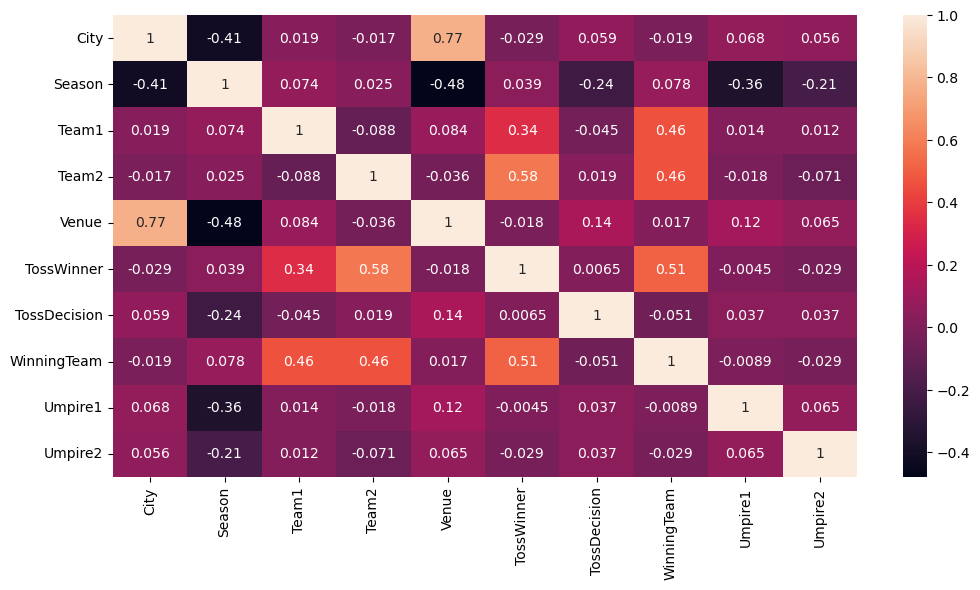

In [47]:
plt.figure(figsize= (12,6))
sns.heatmap(matches_df.corr(), annot= True);

In [48]:
matches_df.WinningTeam.value_counts()

8     131
2     121
1     114
4     109
7     104
3     103
6     101
5      96
9      27
11     25
12      9
10      6
Name: WinningTeam, dtype: int64

In [49]:
# we need to match the number of classes in the target variable for train and test split
# becouse some teams were not present in the last season as well as in before season
# so to match the teams number we need to drop that team data

colms = [9,10,12]
for i in colms:
    content = matches_df[matches_df['WinningTeam'] == i]
    matches_df.drop(content.index, inplace= True)


In [50]:
matches_df.WinningTeam.value_counts()

8     131
2     121
1     114
4     109
7     104
3     103
6     101
5      96
11     25
Name: WinningTeam, dtype: int64

In [51]:
matches_df.skew()

# we can manage this skewness

City            0.968266
Season          0.052710
Team1           0.271872
Team2           0.217519
Venue           0.771243
TossWinner      0.273565
TossDecision    0.527039
WinningTeam     0.260522
Umpire1         0.092827
Umpire2         0.146765
dtype: float64

In [52]:
# lets split up the training and testing data along with X and Y
# taking all season matches as a training data except the last season

train = matches_df[matches_df['Season'] != matches_df['Season'].max()]
test = matches_df[matches_df['Season'] == matches_df['Season'].max()]

In [53]:
print(train.shape)
print(test.shape)

(839, 10)
(65, 10)


In [54]:
# there is no need of season variable now
train.drop(columns='Season', inplace= True)
test.drop(columns='Season', inplace= True)

In [55]:
# splitting dependent variable from the train and test sets
# taking winning team as a target/dependent variable

X_train = train.drop('WinningTeam', axis=1)
Y_train = train['WinningTeam']
X_test = test.drop('WinningTeam', axis=1)
Y_test = test['WinningTeam']

In [56]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(839, 8)
(839,)
(65, 8)
(65,)


In [57]:
# Random forest classifier

from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

In [58]:

forest = RandomForestClassifier()
forest.fit(X_train, Y_train)

RandomForestClassifier()

In [59]:
# Get the feature importances from the trained RandomForestClassifier
importances = forest.feature_importances_

# Loop over each feature and its importance
for i in range(X_train.shape[1]):
    # Print the feature number, name, and importance score
    print("%2d) %-*s %f" % (i + 1, 30, matches_df.columns[i], importances[i]))

 1) City                           0.108376
 2) Season                         0.145005
 3) Team1                          0.161443
 4) Team2                          0.141958
 5) Venue                          0.141216
 6) TossWinner                     0.031754
 7) TossDecision                   0.134451
 8) WinningTeam                    0.135798


### This helps to find the features which are affecting the target variable

### let's see the with the help of a plot

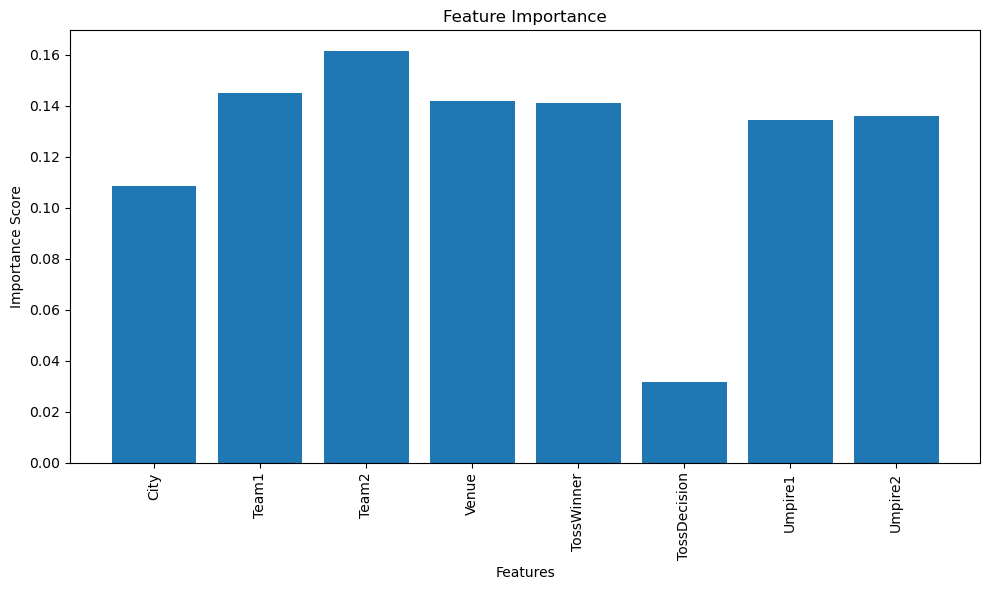

In [60]:
# Plotting the feature importances as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.title('Feature Importance')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()

In [61]:
# Random forest classifier

model_r = RandomForestClassifier()
model_r.fit(X_train, Y_train)

RandomForestClassifier()

In [62]:
# lets check the accuracy
from sklearn.metrics import accuracy_score

y_pred = model_r.predict(X_test)
accuracy = accuracy_score(Y_test,y_pred)
print('Accuracy:',accuracy)

Accuracy: 0.38461538461538464


In [63]:
#  Hyperparameter Tuning

params_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

In [64]:
from sklearn.model_selection import RandomizedSearchCV

model = RandomForestClassifier()
random_search = RandomizedSearchCV(estimator=model, param_distributions=params_grid, cv= 3, scoring='accuracy')

In [65]:
random_search.fit(X_train,Y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 10, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy')

In [66]:
best_params = random_search.best_params_

model = RandomForestClassifier(**best_params)
model.fit(X_train,Y_train)

RandomForestClassifier(max_depth=20, min_samples_split=10, n_estimators=200)

In [67]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test,y_pred)
print('Accuracy:',accuracy)

Accuracy: 0.35384615384615387


In [68]:
# Lgbmclassifier
model_1 = LGBMClassifier()

model_1.fit(X_train, Y_train)

y_pred = model_1.predict(X_test)
accuracy = accuracy_score(Y_test,y_pred)
print('Accuracy:',accuracy)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002665 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 839, number of used features: 8
[LightGBM] [Info] Start training from score -2.050079
[LightGBM] [Info] Start training from score -1.970037
[LightGBM] [Info] Start training from score -2.167863
[LightGBM] [Info] Start training from score -2.127041
[LightGBM] [Info] Start training from score -2.277863
[LightGBM] [Info] Start training from score -2.188916
[LightGBM] [Info] Start training from score -2.147243
[LightGBM] [Info] Start training from score -1.888024
[LightGBM] [Info] Start training from score -4.167261
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

In [69]:
# training with custom hyper parameters

model_1 = LGBMClassifier(boosting_type='gbdt',
                         num_leaves= 31,
                         max_depth= -1,
                         learning_rate=0.01,
                         n_estimators=100)

model_1.fit(X_train, Y_train)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000242 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 839, number of used features: 8
[LightGBM] [Info] Start training from score -2.050079
[LightGBM] [Info] Start training from score -1.970037
[LightGBM] [Info] Start training from score -2.167863
[LightGBM] [Info] Start training from score -2.127041
[LightGBM] [Info] Start training from score -2.277863
[LightGBM] [Info] Start training from score -2.188916
[LightGBM] [Info] Start training from score -2.147243
[LightGBM] [Info] Start training from score -1.888024
[LightGBM] [Info] Start training from score -4.167261
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

LGBMClassifier(learning_rate=0.01)

In [70]:
params_grid = {
    'boosting_type': ['gbdt','dart','rf'],
    'num_leaves': [20, 30, 40],
    'learning_rate': [-0.001,-0.01,-0.1,0.1, 0.01, 0.001],
    'max_depth': [-2,-1,1,2,3],
    'n_estimators': [50, 100, 200]
}

In [71]:
# hypertune lgbm classifier
lgbm_classifier = LGBMClassifier(random_state=42)

random_search_lg = RandomizedSearchCV(estimator=lgbm_classifier, param_distributions=params_grid, cv= 3, scoring='accuracy')

In [72]:
random_search_lg.fit(X_train,Y_train)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000079 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 176
[LightGBM] [Info] Number of data points in the train set: 559, number of used features: 8
[LightGBM] [Info] Start training from score -2.049483
[LightGBM] [Info] Start training from score -1.969441
[LightGBM] [Info] Start training from score -2.167266
[LightGBM] [Info] Start training from score -2.136495
[LightGBM] [Info] Start training from score -2.283098
[LightGBM] [Info] Start training from score -2.183015
[LightGBM] [Info] Start training from score -2.151762
[LightGBM] [Info] Start training from score -1.883498
[LightGBM] [Info] Start training from score -4.128925
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000084 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 185
[LightGBM] [Info] Number of data points in the train set: 559, number of used features: 8
[LightGBM] [Info] Start training from score -2.049483
[LightGBM] [Info] Start training from score -1.969441
[LightGBM] [Info] Start training from score -2.167266
[LightGBM] [Info] Start training from score -2.121457
[LightGBM] [Info] Start training from score -2.265706
[LightGBM] [Info] Start training from score -2.183015
[LightGBM] [Info] Start training from score -2.151762
[LightGBM] [Info] Start training from score -1.895333
[LightGBM] [Info] Start training from score -4.246708
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000068 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 144
[LightGBM] [Info] Number of data points in the train set: 560, number of used features: 8
[LightGBM] [Info] Start training from score -2.051271
[LightGBM] [Info] Start training from score -1.971228
[LightGBM] [Info] Start training from score -2.169054
[LightGBM] [Info] Start training from score -2.123244
[LightGBM] [Info] Start training from score -2.284886
[LightGBM] [Info] Start training from score -2.200802
[LightGBM] [Info] Start training from score -2.138282
[LightGBM] [Info] Start training from score -1.885286
[LightGBM] [Info] Start training from score -4.130712
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000093 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 839, number of used features: 8
[LightGBM] [Info] Start training from score -2.050079
[LightGBM] [Info] Start training from score -1.970037
[LightGBM] [Info] Start training from score -2.167863
[LightGBM] [Info] Start training from score -2.127041
[LightGBM] [Info] Start training from score -2.277863
[LightGBM] [Info] Start training from score -2.188916
[LightGBM] [Info] Start training from score -2.147243
[LightGBM] [Info] Start training from score -1.888024
[LightGBM] [Info] Start training from score -4.167261
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

RandomizedSearchCV(cv=3, estimator=LGBMClassifier(random_state=42),
                   param_distributions={'boosting_type': ['gbdt', 'dart', 'rf'],
                                        'learning_rate': [-0.001, -0.01, -0.1,
                                                          0.1, 0.01, 0.001],
                                        'max_depth': [-2, -1, 1, 2, 3],
                                        'n_estimators': [50, 100, 200],
                                        'num_leaves': [20, 30, 40]},
                   scoring='accuracy')

In [73]:
random_search_lg.best_params_

{'num_leaves': 20,
 'n_estimators': 50,
 'max_depth': -2,
 'learning_rate': 0.1,
 'boosting_type': 'dart'}

In [74]:
y_pred = model_1.predict(X_test)
accuracy = accuracy_score(Y_test,y_pred)
print('Accuracy:',accuracy)

Accuracy: 0.4307692307692308


In [75]:
# Best parameter for Lgbm classifier

best_params_l = {
    'num_leaves' : 20,
    'max_depth' : 2,
    'learning_rate' : 0.1,
    'min_data_in_leaf' : 20,
    'feature_fraction' : 0.8,
    'bagging_fraction' : 0.8,
    'boosting_type' : 'dart',
    'class_weight' : 'balanced',
    'n_estimators' : 50

}

In [76]:
model = LGBMClassifier(**best_params_l)

model.fit(X_train,Y_train)

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000095 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 839, number of use

LGBMClassifier(bagging_fraction=0.8, boosting_type='dart',
               class_weight='balanced', feature_fraction=0.8, max_depth=2,
               min_data_in_leaf=20, n_estimators=50, num_leaves=20)

In [77]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test,y_pred)
print('Accuracy:',accuracy)

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
Accuracy: 0.5384615384615384


## Predictive system based on user input

In [78]:
# Function to get user input for prediction
def get_user_input():
    City = input("Enter the city: ")
    Team1 = input("Enter the first team: ")
    Team2 = input("Enter the second team: ")
    Venue = input("Enter the venue: ")
    Toss_winner = input("Enter the toss winner: ")
    Toss_decision = input("Enter the toss decision (bat or field): ")
    Umpire1 = input("Enter the name of the first umpire: ")
    Umpire2 = input("Enter the name of the second umpire: ")

    # Map user input to numerical forms based on the mappings
    city_numeric = city_mapping.get(City, -1)
    team1_numeric = team_mapping.get(Team1,-1)
    team2_numeric = team_mapping.get(Team2,-1)
    venue_numeric = venue_mapping.get(Venue, -1)
    toss_winner_numeric = team_mapping.get(Toss_winner,-1)
    toss_decision_numeric = temp_toss.get(Toss_decision,-1)
    umpire1_numeric = umpire_dict.get(Umpire1,-1)
    umpire2_numeric = umpire_dict.get(Umpire2,-1)
    
    
    
    user_data = pd.DataFrame({
        'city': [city_numeric],
        'team1': [team1_numeric],
        'team2': [team2_numeric],
        'venue': [venue_numeric],
        'toss_winner': [toss_winner_numeric],
        'toss_decision': [toss_decision_numeric],
        'umpire1': [umpire1_numeric],
        'umpire2': [umpire2_numeric]
    })

    return user_data


In [79]:
# Function to make predictions on user input
def make_predictions(user_data):
    # Make predictions on the user input data
    predictions = model.predict(user_data)

    # Get the probability of winning for the 1st team (team1)
    win_probability_team1 = predictions[0]

    # Convert probability to percentage
    win_probability_percentage_team1 = win_probability_team1 * 10

    return win_probability_percentage_team1

In [87]:
# Main function to run the predictive system
def main():
    print("Welcome to the IPL Match Winner Predictor!")

    #while True:
    user_data = get_user_input()
    win_probability_team1 = make_predictions(user_data)

    # Display the win probability for the 1st team (team1)
    print(f"Win Probability for Team 1: {win_probability_team1:.2f}%")
    win_probability_team2 = 100 - win_probability_team1
    print(f"Win Probability for Team 2: {win_probability_team2:.2f}%")    

    print("\n\nThank you for using the IPL Match Winner Predictor!")

if __name__ == "__main__":
    main()

Welcome to the IPL Match Winner Predictor!
Enter the city: Mumbai
Enter the first team: Mumbai Indians
Enter the second team: Kolkata Knight Riders
Enter the venue: Wankhede Stadium
Enter the toss winner: Mumbai Indians
Enter the toss decision (bat or field): field
Enter the name of the first umpire: AY Dandekar
Enter the name of the second umpire: CB Gaffaney
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
Win Probability for Team 1: 80.00%
Win Probability for Team 2: 20.00%


Thank you for using the IPL Match Winner Predictor!


In [ ]:
CB Gaffaney   AY Dandekar    Sawai Mansingh Stadium